# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

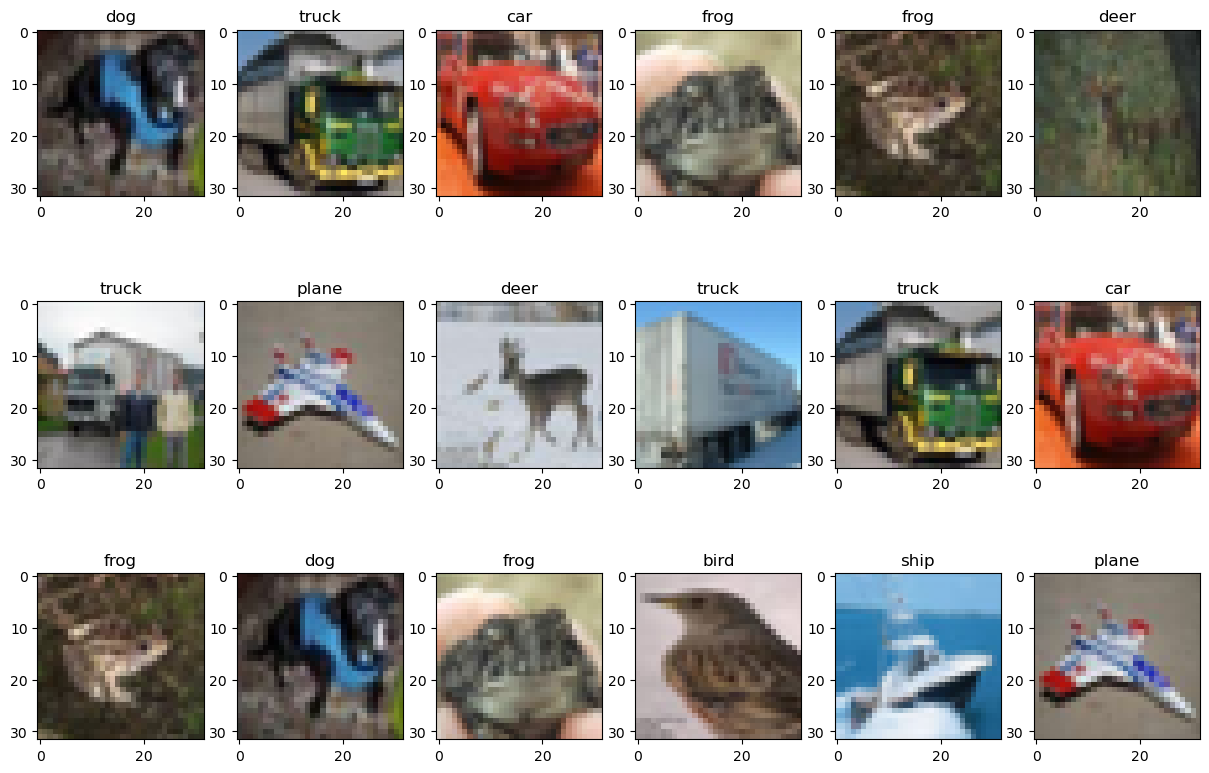

In [9]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]
plt.imshow(x_train[1, ...])

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Classes ID'), Text(0, 0.5, 'Counts'))

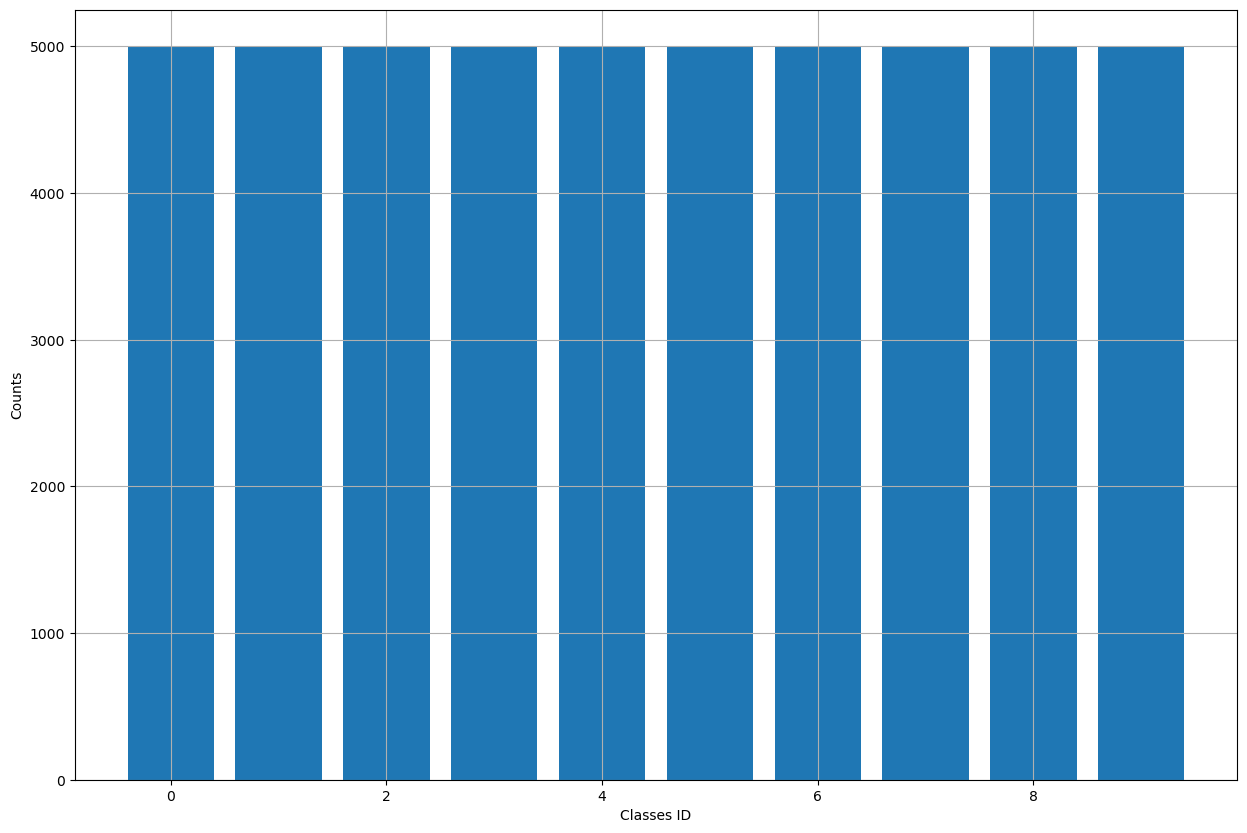

In [10]:
# Compute the class histogram
from collections import Counter
hist = Counter(y_train.flatten())

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Classes ID'), plt.ylabel('Counts')


### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [11]:
# Normalization
x_train = (x_train - np.mean(x_train))/np.std(x_train)
x_test = (x_test - np.mean(x_test))/np.std(x_test)

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
print(y_train)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [12]:
# Build the classifier
# CIFAR10 consist of 32x32 RGB (3 channels) pictures
inputs = Input(shape = (32, 32, 3))
net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
# Show the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0   

### Step 3: Training

Compile the model and train it.

In [13]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
352/352 [==============================] - 8s 22ms/step - loss: 1.5928 - accuracy: 0.4324 - val_loss: 1.3555 - val_accuracy: 0.5240
Epoch 2/25
352/352 [==============================] - 8s 21ms/step - loss: 1.2892 - accuracy: 0.5511 - val_loss: 1.2232 - val_accuracy: 0.5738
Epoch 3/25
352/352 [==============================] - 8s 21ms/step - loss: 1.1692 - accuracy: 0.5938 - val_loss: 1.1342 - val_accuracy: 0.6138
Epoch 4/25
352/352 [==============================] - 7s 21ms/step - loss: 1.0857 - accuracy: 0.6237 - val_loss: 1.0652 - val_accuracy: 0.6362
Epoch 5/25
352/352 [==============================] - 8s 21ms/step - loss: 1.0284 - accuracy: 0.6469 - val_loss: 1.0292 - val_accuracy: 0.6466
Epoch 6/25
352/352 [==============================] - 7s 21ms/step - loss: 0.9830 - accuracy: 0.6602 - val_loss: 1.0019 - val_accuracy: 0.6540
Epoch 7/25
352/352 [==============================] - 8s 22ms/step - loss: 0.9483 - accuracy: 0.6731 - val_loss: 0.9916 - val_accuracy: 0.6592

Train Acc      0.7532222270965576
Validation Acc 0.6729999780654907


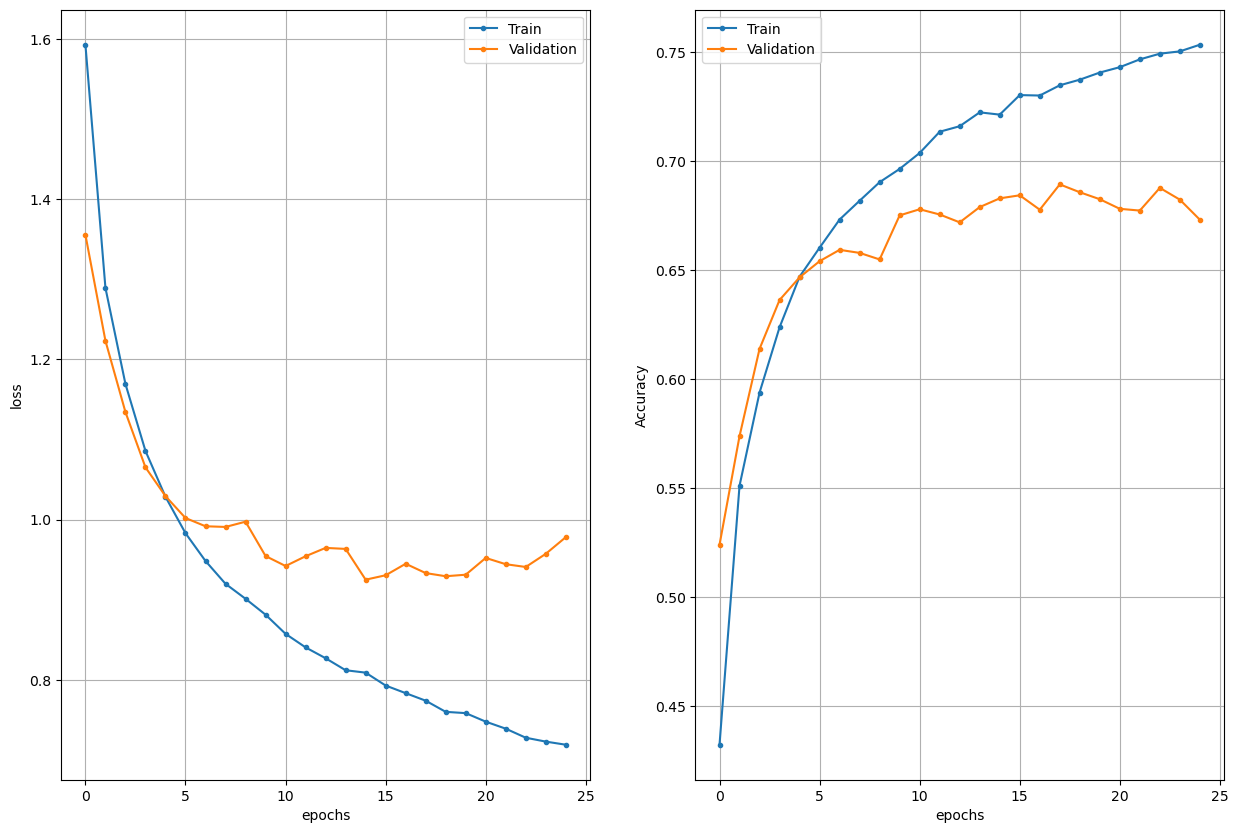

In [14]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [15]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 [==============================] - 1s 3ms/step
True [3 8 8 0 6]
Pred [3 1 8 0 3]
Pred [[3.70362289e-02 4.19706153e-03 1.55018140e-02 6.55315459e-01
  7.29550701e-03 5.25617488e-02 4.55578454e-02 1.00372662e-03
  1.71716467e-01 9.81415436e-03]
 [6.61709756e-02 7.96311259e-01 1.62198683e-06 1.17693936e-07
  2.16411621e-07 5.55100943e-09 2.52899451e-10 3.48293867e-07
  1.24949880e-01 1.25656044e-02]
 [4.89661098e-02 4.62858938e-02 2.77529092e-04 6.56665477e-04
  1.41278884e-04 6.92854010e-05 1.98460490e-04 4.61677642e-04
  8.94170821e-01 8.77235550e-03]
 [9.31947112e-01 5.18455803e-02 6.42028986e-04 2.21089722e-05
  1.18236289e-06 5.19772456e-08 2.46523587e-06 2.70207765e-05
  1.54186413e-02 9.38512312e-05]
 [8.94370169e-06 1.33249792e-04 2.51419619e-02 5.31840205e-01
  9.78236720e-02 4.11256123e-03 3.40654820e-01 9.75217972e-06
  2.60970788e-04 1.39077265e-05]]
(10000, 10)


In [16]:
y_pred = np.argmax(y_pred, axis=1)
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    mask = y_true == class_id
    
    tp = np.sum(y_pred[mask] == class_id)
    total = np.sum(mask)
    
    acc = tp/total 
    print(class_name, '-', acc)

plane - 0.753
car - 0.849
bird - 0.683
cat - 0.465
deer - 0.519
dog - 0.503
frog - 0.69
horse - 0.757
ship - 0.728
truck - 0.753


In [17]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.9871 - accuracy: 0.6700
Test loss   0.9870626926422119
Test metric 0.6700000166893005


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

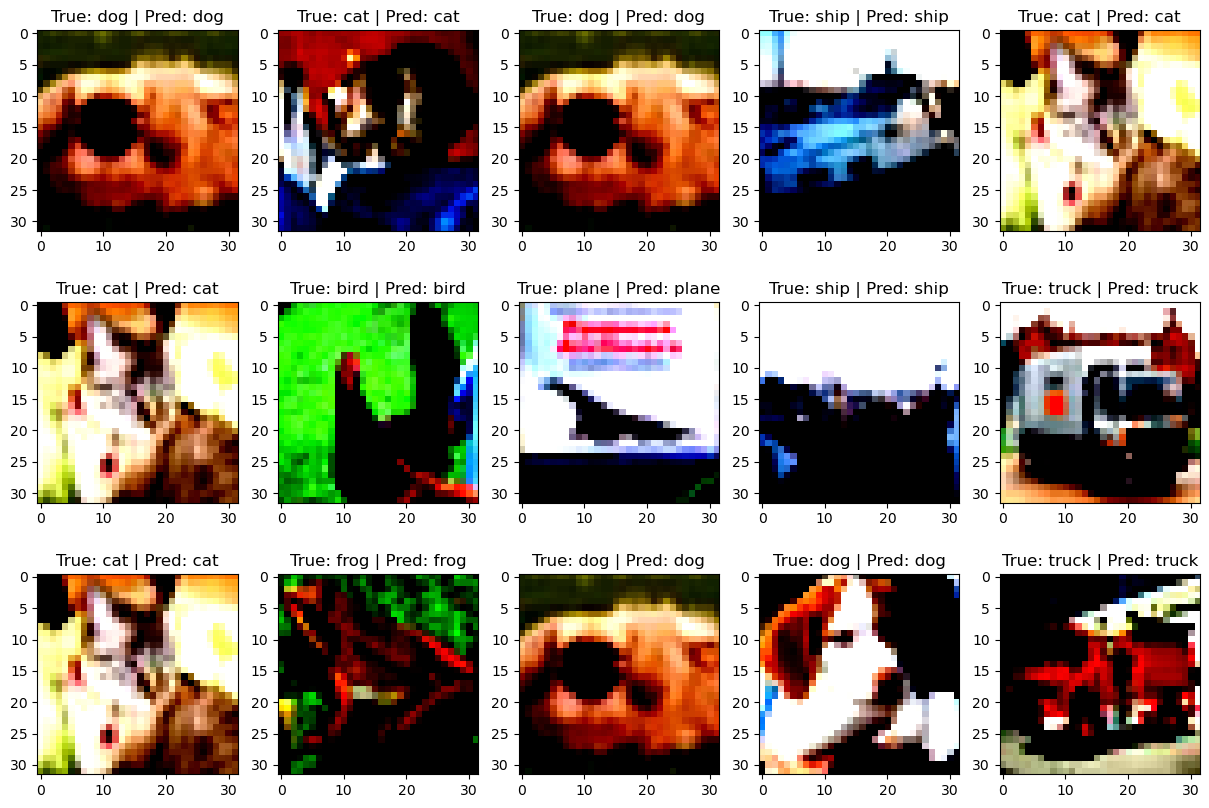

In [18]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

### Answers
*  Overall accuracy of the classifier - is the fraction of predictions our model got right
* Modification suggestions:
    * increase the number of epochs 
    * increase number of layers in model
* Additional layer with more filters increases accurecy for 1-2%